In [1]:
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from squidpy.pl._utils import save_fig

sc.logging.print_header()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3
sc.settings.dpi = 300
sq.__version__
sc.settings.figdir = "./figures"

%load_ext autoreload
%autoreload 2
%load_ext lab_black

# PATH_FIGURES = "/Users/giovanni.palla/Projects/squidpy_reproducibility/notebooks/graph_figures/figures"

/Users/giovanni.palla/.local/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.0) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


scanpy==1.7.0rc2.dev1+g2a123065 anndata==0.7.4 umap==0.4.6 numpy==1.19.4 scipy==1.5.2 pandas==1.1.4 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 leidenalg==0.8.2


In [2]:
adata = sc.read("/Users/giovanni.palla/Datasets/tutorial_data/4i.h5ad")
adata

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 270938 × 43
    obs: 'x', 'y', 'is_nucleous', 'is_cytplasm', 'cell_id', 'leiden', 'cluster'
    uns: 'cluster_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [4]:

sc.pl.spatial(
    adata,
    spot_size=1,
    color="cluster",
#     save="_4i.png",
#     show=False,
)

[<AxesSubplot:title={'center':'cluster'}, xlabel='spatial1', ylabel='spatial2'>]

In [3]:
sq.gr.spatial_neighbors(adata)

Creating graph using `visium` coordinates and `None` transform
Adding `adata.obsp['spatial_connectivities']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)


In [4]:
sq.gr.moran(adata, n_jobs=6)

/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Calculating for `4000` genes using `6` core(s)
/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
  warnings.warn(message)


Adding `adata.uns['moranI']`
Finish (0:03:36)


In [17]:
sc.pl.spatial(
    adata,
    color=["Nrgn", "Camk2n1", "Mobp", "cluster"],
    save="_moran.png",
    show=False,
)

/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


[<AxesSubplot:title={'center':'Nrgn'}, xlabel='spatial1', ylabel='spatial2'>,
 <AxesSubplot:title={'center':'Camk2n1'}, xlabel='spatial1', ylabel='spatial2'>,
 <AxesSubplot:title={'center':'Mobp'}, xlabel='spatial1', ylabel='spatial2'>,
 <AxesSubplot:title={'center':'cluster'}, xlabel='spatial1', ylabel='spatial2'>]

In [6]:
sq.gr.ligrec(
    adata,
    cluster_key="cluster",
)

Fetching interactions from `omnipath`
Fetched `7607` interactions
    Finish (0:00:02)
Running `1000` permutations on `2080` interactions and `225` cluster combinations using `1` core(s)


Adding `adata.uns['cluster_ligrec']`
Finish (0:00:28)


/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


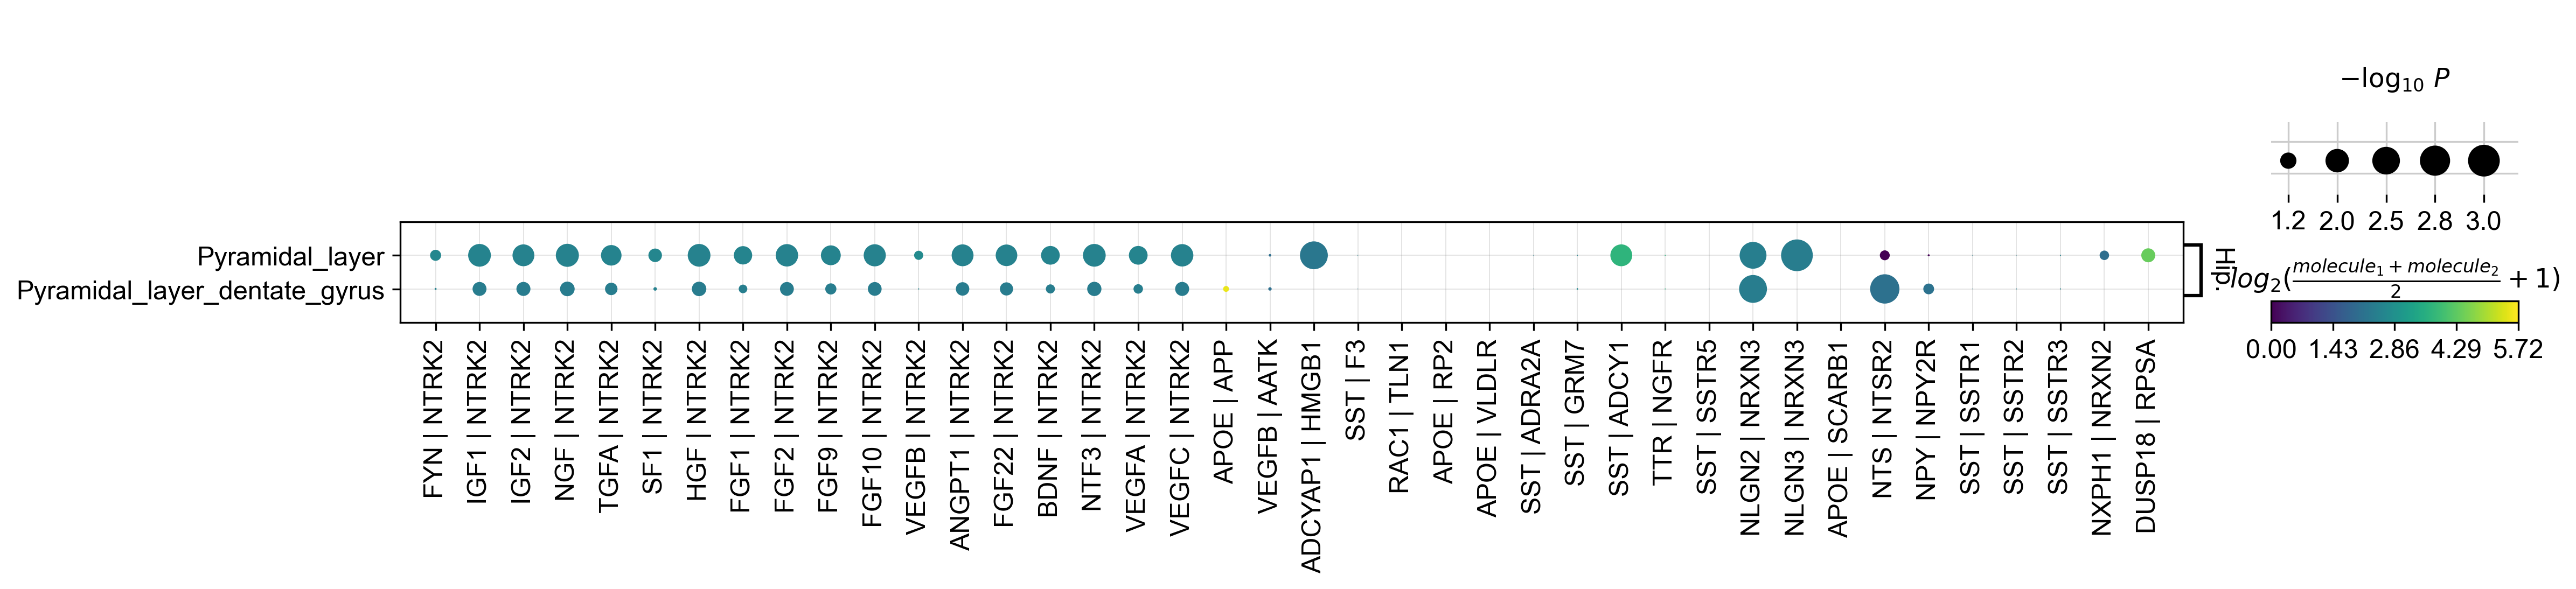

In [18]:
sq.pl.ligrec(
    adata,
    cluster_key="cluster",
    source_groups="Hippocampus",
    target_groups=["Pyramidal_layer", "Pyramidal_layer_dentate_gyrus"],
    means_range=(3, np.inf),
    alpha=1e-4,
    swap_axes=True,
    dpi=300,
    title="",
    #     figsize=(5, 10),
    width=2,
    save="ligrec_visium.png",
)

In [19]:
adata = sc.read("/Users/giovanni.palla/Datasets/tutorial_data/seqfish.h5ad")
adata

AnnData object with n_obs × n_vars = 19416 × 351
    obs: 'Area', 'celltype_mapped_refined'
    uns: 'celltype_mapped_refined_colors'
    obsm: 'X_umap', 'spatial'

In [24]:
sc.pl.spatial(
    adata,
    color=["celltype_mapped_refined"],
    save="_seqfish.png",
    spot_size=0.03,
)

SyntaxError: keyword argument repeated (<ipython-input-24-b24ba2aa363b>, line 6)

In [56]:
adata.obsp["spatial_distances"].max()

0.26964718496043566

In [64]:
sq.gr.spatial_neighbors(
    adata,
)
sq.gr.nhood_enrichment(adata, cluster_key="celltype_mapped_refined", n_perms=10000)

Creating graph using `generic` coordinates and `None` transform
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Adding `adata.uns['celltype_mapped_refined_nhood_enrichment']`


In [ ]:
sq.pl.nhood_enrichment(
    adata,
    cluster_key="celltype_mapped_refined",
    cmap="inferno",
    dendrogram=True,
    title="",
    method="centroid",
    dpi=300,
    save="nhod_seqfish.png",
)

/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/giovanni.palla/Projects/squidpy/squidpy/pl/_utils.py:508: MatplotlibDeprecationWarning: In a future version, 'pad' will default to rcParams['figure.subplot.hspace'].  Set pad=0 to keep the old behavior.
  col_ax = divider.append_axes("top", size="5%")
Trying to set attribute `.X` of view, copying.


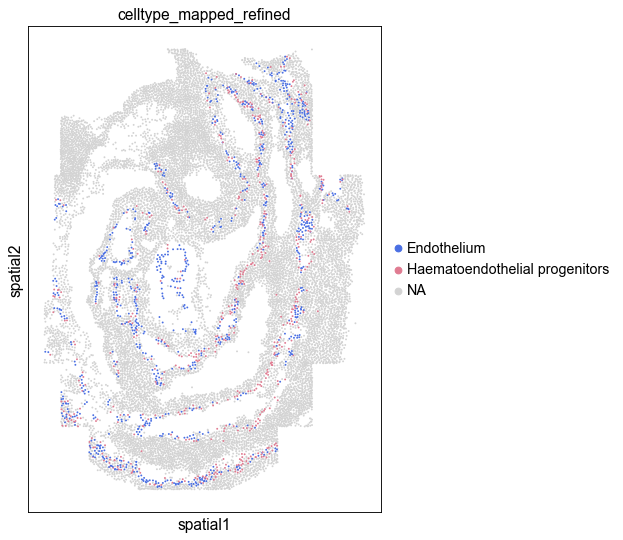

In [77]:
sc.pl.spatial(
    adata,
    color=["celltype_mapped_refined"],
    groups=[
        "Endothelium",
        "Haematoendothelial progenitors",
    ],
    save="_endo_seqfish.png",
    spot_size=0.03,
)

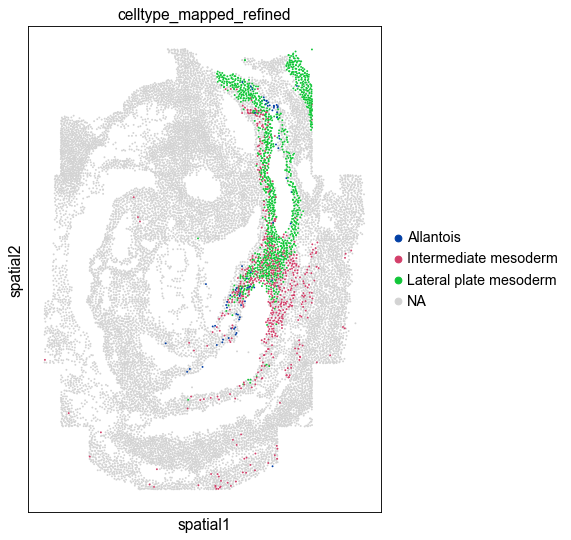

In [79]:
sc.pl.spatial(
    adata,
    color=["celltype_mapped_refined"],
    groups=[
        "Intermediate mesoderm",
        "Lateral plate mesoderm",
        "Allantois",
    ],
    save="_meso_seqfish.png",
    spot_size=0.03,
)

In [81]:
sq.gr.co_occurrence(
    adata,
    cluster_key="celltype_mapped_refined",
)

Calculating co-occurrence probabilities
Adding `adata.uns['celltype_mapped_refined_co_occurrence']`
Finish (0:00:43)


/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  fig.canvas.print_figure(bytes_io, **kw)


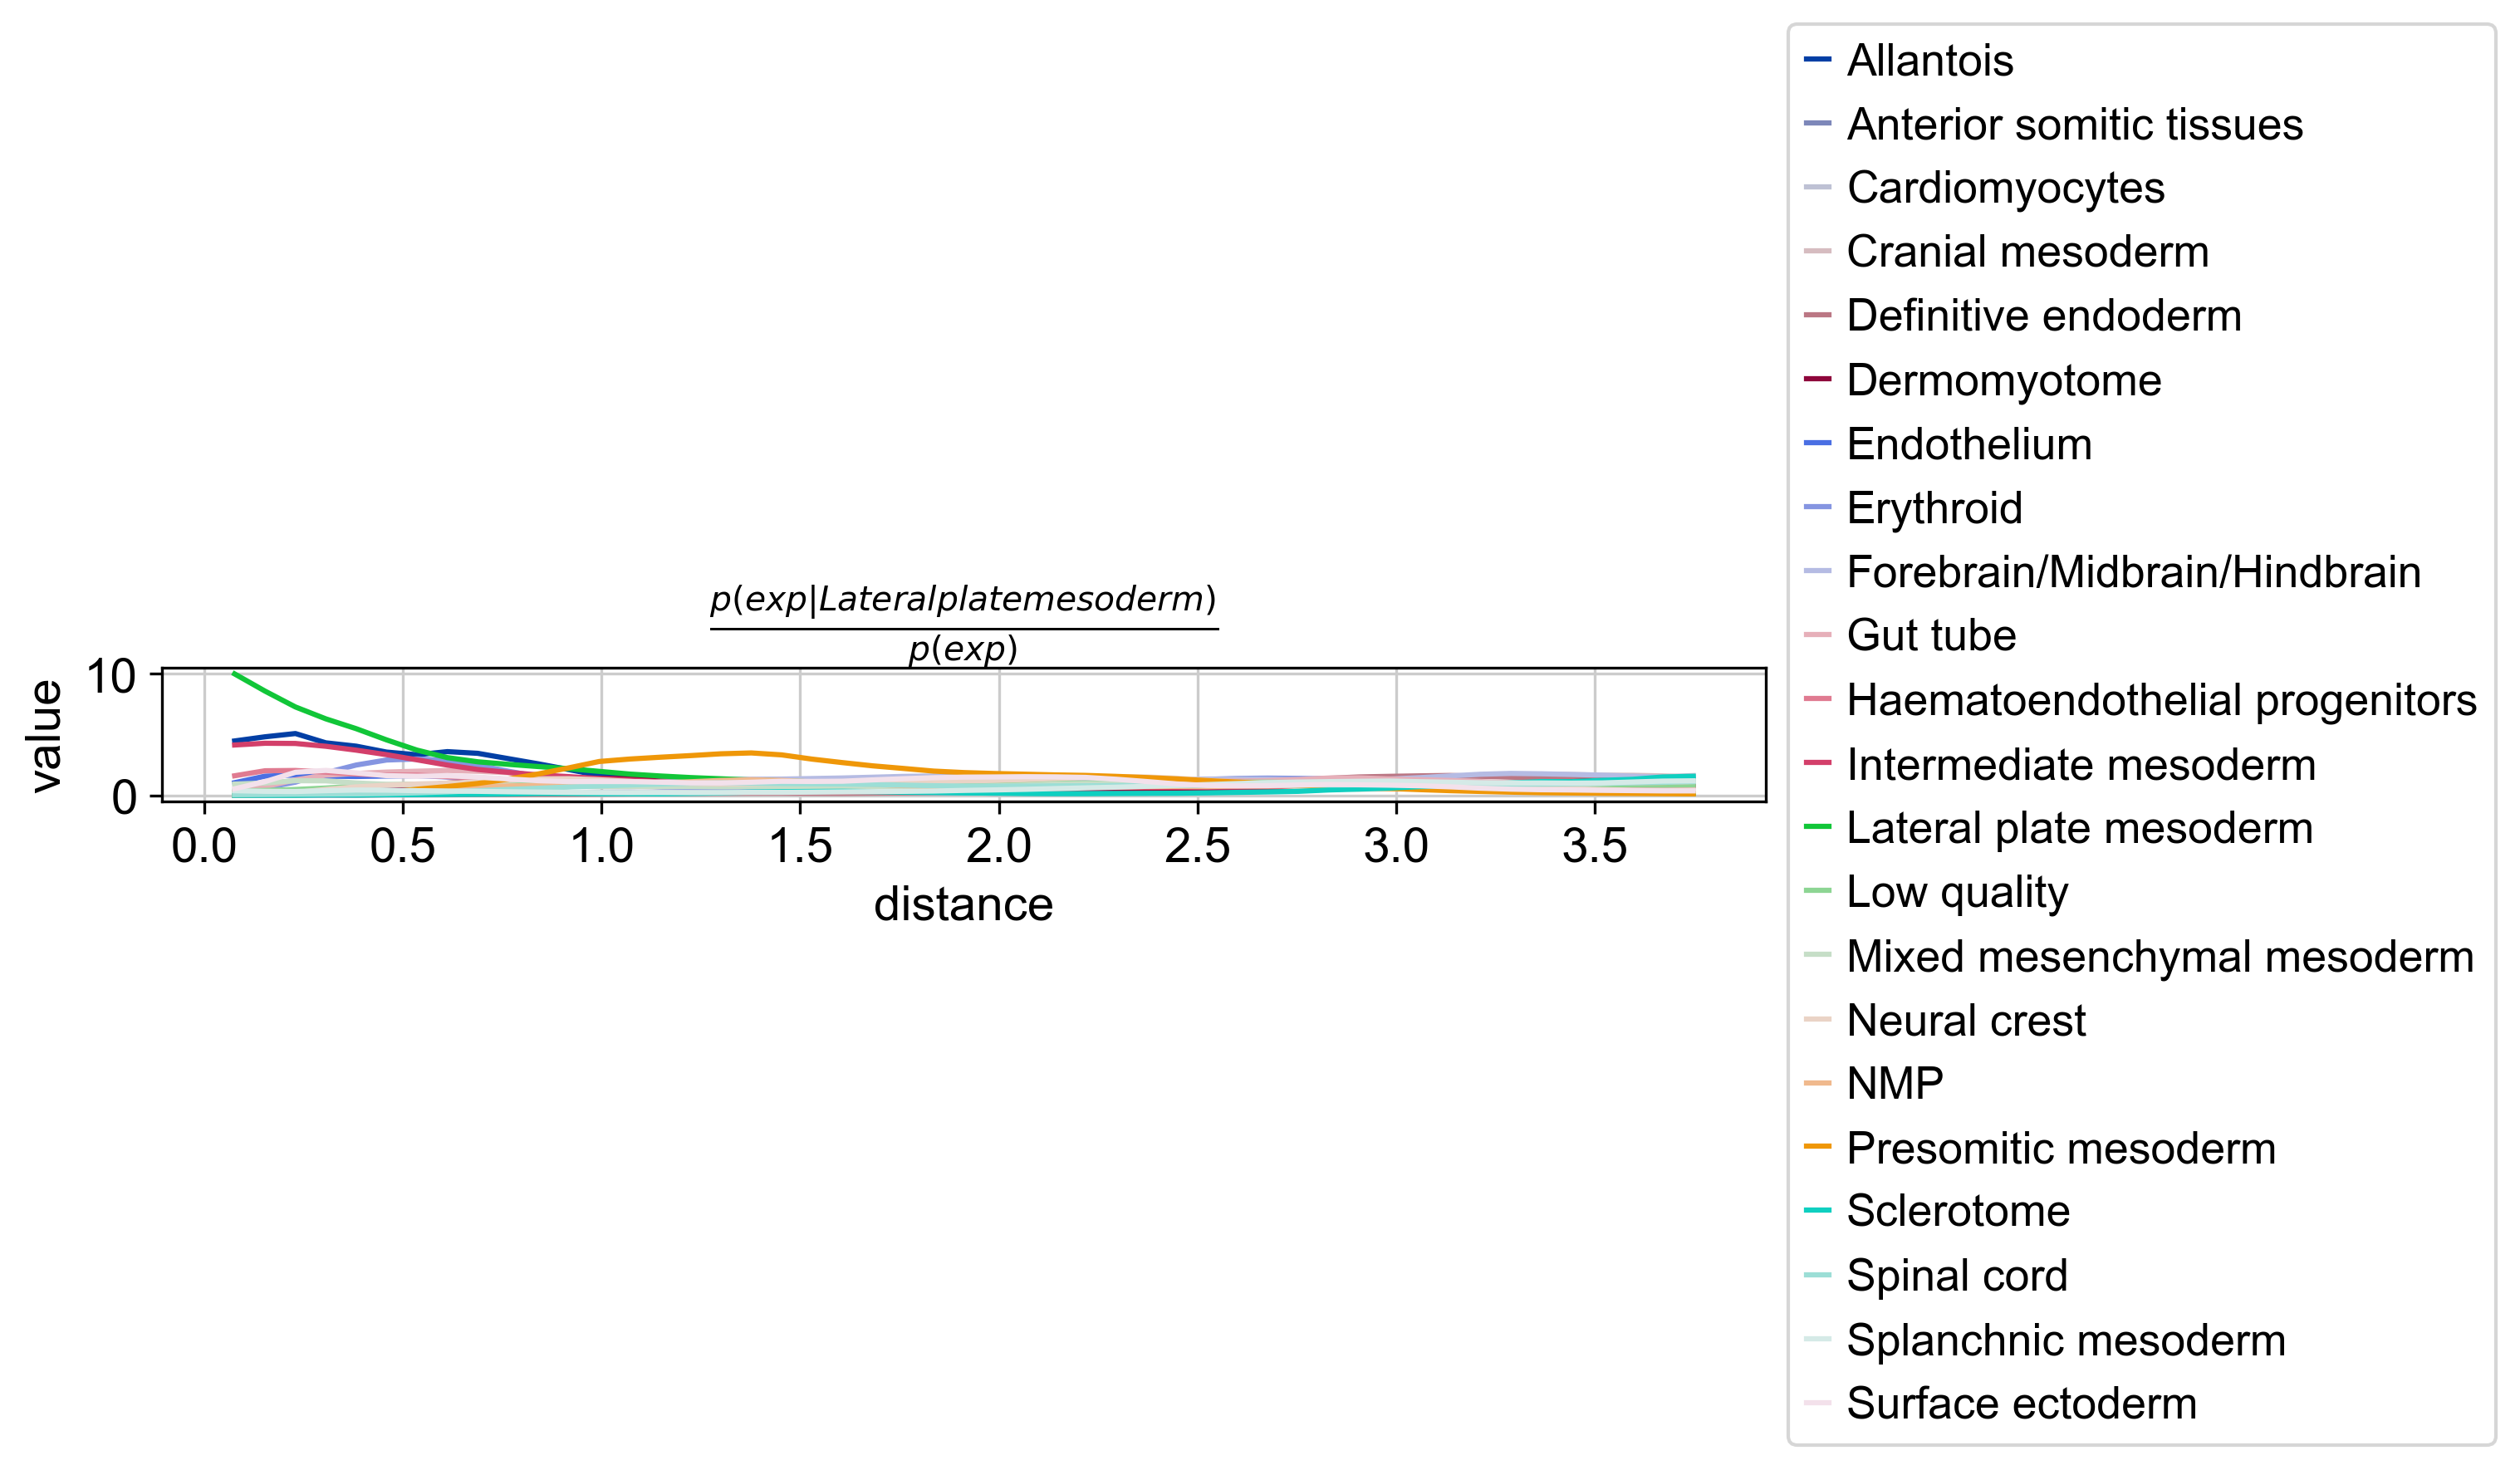

In [85]:
sq.pl.co_occurrence(
    adata,
    cluster_key="celltype_mapped_refined",
    clusters="Lateral plate mesoderm",
    figsize=(10, 5),
    dpi=300,
    save="co_occurrence_seqfish",
)

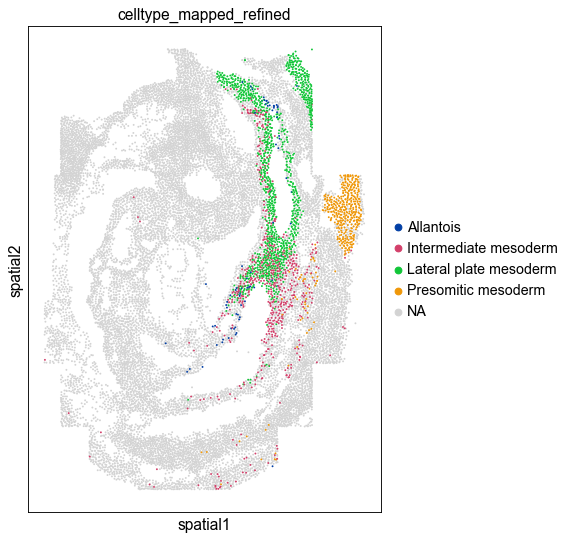

In [86]:
sc.pl.spatial(
    adata,
    color="celltype_mapped_refined",
    groups=[
        "Allantois",
        "Lateral plate mesoderm",
        "Intermediate mesoderm",
        "Presomitic mesoderm",
    ],
    save="_meso_seqfish.png",
    spot_size=0.03,
)

In [8]:
adata.uns['celltype_mapped_refined_ripley_k'].celltype_mapped_refined.unique()

array(['Allantois', 'Definitive endoderm', 'Cardiomyocytes'], dtype=object)